### IDs:
Insert yours IDs to the cell below

ID #1: 806646


In [6]:
import numpy as np
from numpy.core.numeric import NaN
import pandas as pd
from collections import Counter
from pathlib import Path 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
import statistics
import random
import math
import scipy
from scipy.stats import binom, multinomial, norm
from scipy import stats
from sklearn import preprocessing
from scipy.stats import truncnorm
import sklearn
import warnings
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
warnings.filterwarnings('ignore')

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [7]:
from sklearn import datasets
boston = datasets.load_boston()

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
X = boston.data
y = boston.target

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

#### 1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?

In [10]:
df = pd.DataFrame(columns=boston.feature_names, data=X)
df["MEDV"] = y
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

This dataset has 506 samples with no missing values. It has 13 features without the target variable, and 14 including the target variable. All features are float objects.`

#### 2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

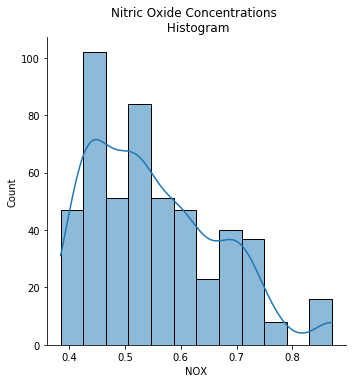

In [13]:
sns.displot(x=df.NOX, kde=True)
plt.title("Nitric Oxide Concentrations \n Histogram");

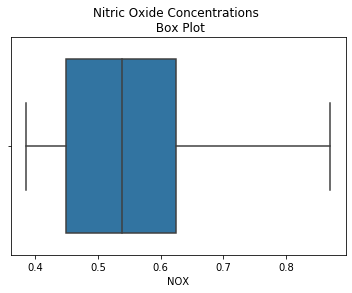

In [14]:
sns.boxplot(df.NOX)
plt.title("Nitric Oxide Concentrations \n Box Plot");

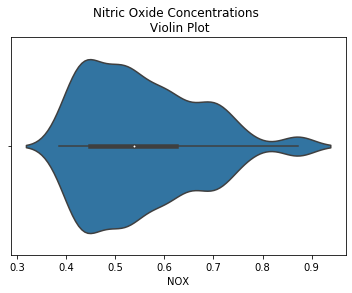

In [15]:
sns.violinplot(df.NOX)
plt.title("Nitric Oxide Concentrations \n Violin Plot");

The Nitric Oxide concentration distribution is slightly right skewed, meaning the mean is higher than the median. There is a small bump of values at around 0.9 which contributes to the skewness and higher mean in this case.` 

#### 3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

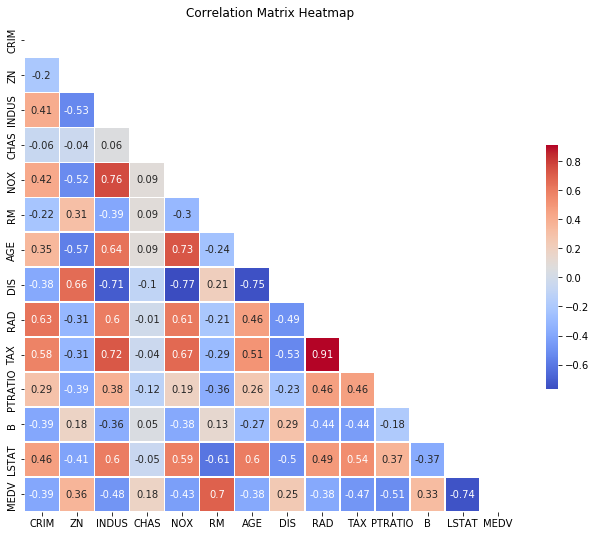

In [16]:
corr_mat = round(df.corr(), 2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap");

There's especially high correlation of 0.91 between TAX and RAD where TAX is the Full-value property tax rate per $10,000, and RAD is Index of accessibility to radial highways. This means higher access to highways yields a higher property value. CHAS has an overall low correlation across the data features. `

#### 4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

The 2 pairs of features with the highest correlation are (NOX and INDUS) and (TAX and RAD).
NOX and INDUS have a 76% correlation, TAX and RAD have a 91% correlation. Their joint distributions are provided below.`

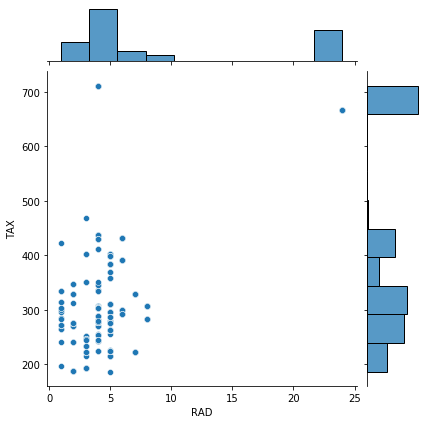

In [17]:
sns.jointplot(x=df.RAD, y=df.TAX);

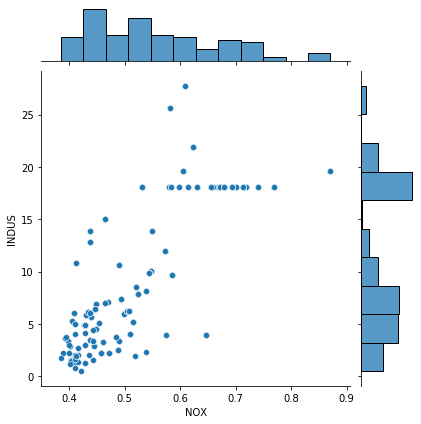

In [18]:
sns.jointplot(x=df.NOX, y=df.INDUS);

#### 5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

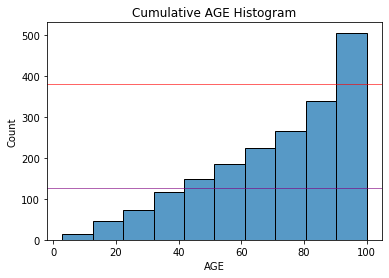

In [19]:
sns.histplot(df.AGE, cumulative=True)
plt.axhline(y=0.25*df.AGE.value_counts().sum(), color='purple', linestyle='-', lw=0.6)
plt.axhline(y=0.75*df.AGE.value_counts().sum(), color='red', linestyle='-', lw=0.6)
plt.title("Cumulative AGE Histogram");

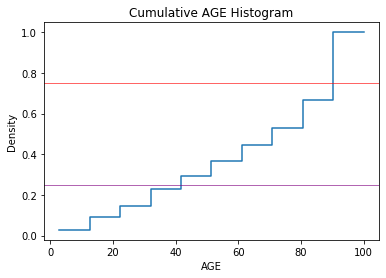

In [20]:
sns.histplot(df.AGE, cumulative=True, fill=False, element="step", stat="density")
plt.axhline(y=0.25, color='purple', linestyle='-', lw=0.6)
plt.axhline(y=0.75, color='red', linestyle='-', lw=0.6)
plt.title("Cumulative AGE Histogram");

#### 6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

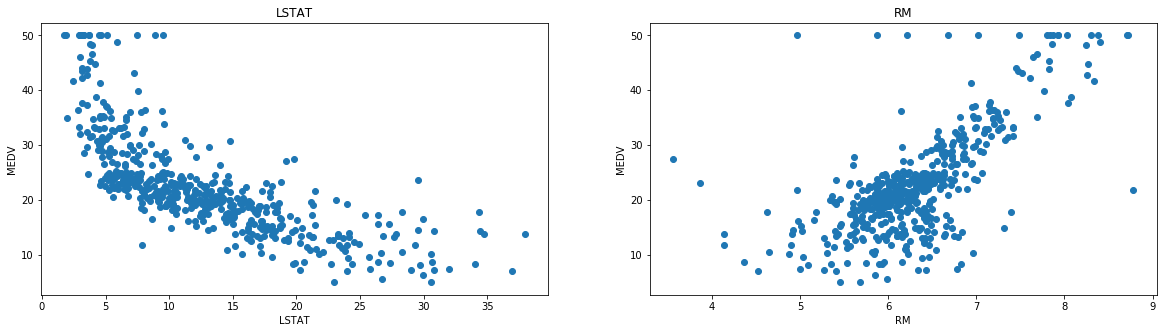

In [21]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

An interesting trend in the data is that median Value Prices increase linearly as RM increases. We can see several outliers and max values at 9 and 50. Another interesting trend is that price decreases with LSTAT, but the relationship looks less linear.  

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer 

\# params = $(n*m*k)-1$ 

We need to account for every possible combinaton of the three variables' values (8 total), but as all the probabilities sum to 1, it is sufficient to have $n*m*k$ parameters and calculate the last one as 1-(sum of other probabilities).

= $(2*2*2)-1$ 

= 7

Therefore, the number of paramaters that define the joint distribution of $X, Y and Z$ is 7.


#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer

X, Y and Z are independent if for all i,j,k:

$P(X=x_i$ and $Y=y_j$ and $Z=z_k) = P(X=x_i)*P(Y=y_j)*P(Z=z_k)$

Due to this, we only need to consider the probabilities of each distribution taking on each of the two values. This only requries 1 parameter for each distribution because the second can be calculated from 1-(first probability).

Therefore, 3 parameters define the joint distribution of $X, Y and Z$ if they are independent.


#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer

$X$ and $Y$ are conditionally independent given $Z$ if for all pairs $(x,y)$ and for all possible values $z$ of $Z$:

$P(X=x \cap Y=y| Z=z) = P(X=x|Z=z) * P(Y=y|Z=z)$

We need two parameters to represent each of $P(X=x|Z=z)$ and $P(Y=y|Z=z)$, one parameter for each value $Z$ can take on. Representing P(Z) only requires 1 parameter because the probability of the other value of Z can be calculated from 1-P.

Therefore, 5 parameters define the joint distribution of $X, Y and Z$ if they $X$ and $Y$ are conditionally independent on $Z$.

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

#### Answer

If we consider two fair coins and random variables: $X$ = first coin heads, $Y$ = second coin heads, $Z$ = both coins are the same.

$X$ and $Y$ are independent - the result of tossing one coin does not depend on the result of tossing the other coin.

However, $X$ and $Y$ are NOT conditionally independent given $Z$: if we know that $Z$ happened (result of both tosses is the same), then if we know $X$ we know $Y$ and vice versa.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [22]:
gmd = pd.read_csv("GMD_2021.csv", header=None).rename({1:"data"}, axis=1).drop(0, axis=1)
gmd.shape
gmd.head

<bound method NDFrame.head of           data
0     3.575253
1     4.105491
2     3.903642
3     4.472249
4     4.297265
..         ...
795  16.596823
796  16.314496
797  14.690099
798  12.942772
799  13.369323

[800 rows x 1 columns]>

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

## Approach #1 

In [23]:
# given:
mu1, mu2, v1, v2, v3, w2 = 4, 9, (1/0.5**2), (1/0.5**2), (1/1.5**2), 0.25
# missing: (init randomly)
mu3, w1, w3 = np.mean(gmd), np.random.randint(0,1), np.random.randint(0,1)
    
# create gaussian mixture model
# don't need to init w1 and w3, they are estimated
gm = GaussianMixture(n_components=3, means_init=[[mu1], [mu2], [mu3]], covariance_type='spherical', precisions_init=[v1, v2, v3], random_state=222, verbose=1)
gm.fit(gmd)

# get estimated params
means = gm.means_
covariances = gm.covariances_
weights = gm.weights_

print('First Gaussian: N({0},{1}) with w1 = {2}'.format(means[0][0], np.sqrt(covariances[0]), weights[0]))
print('Second Gaussian: N({0},{1}) with w2 = {2}'.format(means[1][0], np.sqrt(covariances[1]), weights[1]))
print('Third Gaussian: N({0}, {1}) with w3 = {2}'.format(means[2][0], np.sqrt(covariances[2]), weights[2]))

Initialization 0
Initialization converged: True
First Gaussian: N(4.0838106079523095,0.4687898845787385) with w1 = 0.12499999994933375
Second Gaussian: N(8.997144541011966,0.5246674601776592) with w2 = 0.2499578664185935
Third Gaussian: N(15.102117433492623, 1.5020946672095787) with w3 = 0.6250421336320726


## Approach #2

In [24]:
# given:
mu1, mu2, v1, v2, v3 = 4, 9, 0.5, 0.5, 1.5
# missing: (init randomly)
mu3, w1, w3 = np.mean(gmd), 0.33, 0.33

# init params
dist1_params = [mu1, v1, w1]
dist2_params = [mu2, v2, w2]
dist3_params = [mu3, v3, w3]

def new_responsibilities(df):
    r1 = dist1_params[2] * norm.pdf(df, dist1_params[0], scale = dist1_params[1])
    r2 = dist2_params[2] * norm.pdf(df, dist2_params[0], scale = dist2_params[1])
    r3 = dist2_params[2] * norm.pdf(df, dist3_params[0], scale = dist3_params[1])
    rsum = r1+r2+r3
    
    r1 = r1/rsum
    r2 = r2/rsum
    r3 = r3/rsum
    
    return r1,r2,r3


def new_params(r1, r2, r3, length):
    w1 = np.sum(r1) / length
    w2 = np.sum(r2) / length
    w3 = np.sum(r3) / length
    mu3 = (np.sum(r3 * gmd) / (w3 * length)).values[0]

    return w1, w2, w3, mu3

In [25]:
max_iter = 100 #max number of iterations to do
tol = 0.0001 #convergence threshold 
length = len(gmd)

for i in range(1,max_iter):
    r1, r2, r3 = new_responsibilities(gmd)
    updated_w1, updated_w2, updated_w3, updated_mu3 = new_params(r1, r2, r3, length)
    
    # check convergence
    check1 = np.isclose(a=dist1_params[2], b=updated_w1, atol=tol)
    check2 = np.isclose(a=dist2_params[2], b=updated_w2, atol=tol)
    check3 = np.isclose(a=dist3_params[2], b=updated_w3, atol=tol)
    check4 = np.isclose(a=dist3_params[0], b=updated_mu3, atol=tol)

    if (check1 and check2 and check3 and check4):
        num_iter = i
        print('Converged')
        break
    
    # if no covergence, update the params
    dist3_params[0] = updated_mu3
    dist1_params[2] = updated_w1
    dist2_params[2] = updated_w2
    dist3_params[2] = updated_w3

print('Converged after',num_iter, 'iterations.')

print('First Gaussian: N({0},{1}) with w1 = {2}'.format(dist1_params[0], dist1_params[1], dist1_params[2]))
print('Second Gaussian: N({0},{1}) with w2 = {2}'.format(dist2_params[0], dist2_params[1], dist2_params[2]))
print('Third Gaussian: N({0}, {1}) with w3 = {2}'.format(dist3_params[0], dist3_params[1], dist3_params[2]))

Converged
Converged after 4 iterations.
First Gaussian: N(4,0.5) with w1 = 0.12499999998375515
Second Gaussian: N(9,0.5) with w2 = 0.250695739246992
Third Gaussian: N(15.10787508244915, 1.5) with w3 = 0.6243042607692528


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### Answer:
We set the limits for the x axis according to the range of data in the original gmd.
We set the limits for the y axis far enough to see the entire distribution.

[4, 0.5, 0.12499999998375515] [9, 0.5, 0.250695739246992] [15.10787508244915, 1.5, 0.6243042607692528]


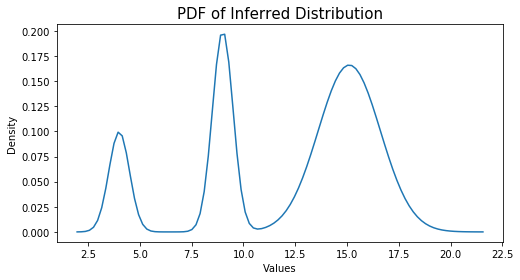

In [26]:
#Using the results from approach 2:

print(dist1_params,dist2_params,dist3_params)
x = np.linspace(gmd.min()-1, gmd.max()+1, num=100) 
pdf1 = dist1_params[2] * norm.pdf(x, dist1_params[0], scale = dist1_params[1])
pdf2 = dist2_params[2] * norm.pdf(x, dist2_params[0], scale = dist2_params[1])
pdf3 = dist3_params[2] * norm.pdf(x, dist3_params[0], scale = dist3_params[1])

density = np.sum(np.array([pdf1,pdf2,pdf3]), axis=0)

plt.figure(figsize=(8,4))
plt.plot(x, density)
plt.title('PDF of Inferred Distribution', fontsize=15)
plt.xlabel("Values", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### Answer
Approach 1: Yes, using the sklearn GMM function we can still estimate the unknown parameters. We would simply need to set n_componenets to 4, instead of 3, and initialize all the paramaters of the fourth gaussian randomly.

Approach 2: This approach can estimate the unknown parameters assuming 4 gaussians, however, the functions would have to be modified slightly. We would need to initialize the fourth distribution and add it to all the calculation functions. This is fairly straight forward but not exactly optimal.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### Answer:
#### Approach #1:
Generate 3 arrays of size n//3,
sample array 1 from $N(\mu_1 + 3, 1)$, array 2 from $N(\mu_2 + 5, 1)$, and array 3 from $N(\mu_3 + 7, 1)$.
Merge the 3 arrays into one distribution.

#### Approach #2:
Generate 3 arrays of size n//3 and sample them all randomly from a uniform distribution over \[0,1).
The inverse of the CDF of a random variable $X$ at $\alpha$, $F^{-1}(\alpha)$, is the value of $x_\alpha$ such that $P(x \leq x_\alpha)$.
So, we can calculate the inverse of the CDF of 3 random variables with the desired parameters from a random array of percentages, and then calculate the $\alpha$ values to get the actual values that create a distribution with those parameters.
Then, as before, we can merge the 3 arrays into one distribution to get the desired GMM.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


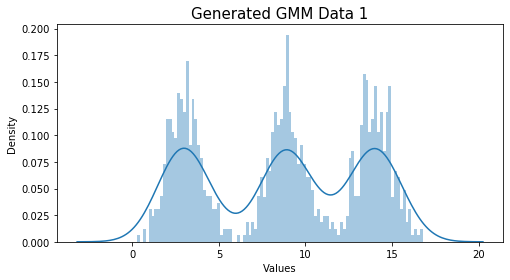

In [27]:
"""Using Approach #1"""
# random:
x1,x2,x3 = 0,2,4
#given:
mu1, mu2, mu3 = x1+3,x2+7,x3+10 #choose random locations
sigma1 = sigma2 = sigma3 = 1
w1 = w2 = w3 = 0.33

n = (1000//3)
np.random.seed(222)
dist1 = norm.rvs(loc=mu1, scale=sigma1, size=n+1) #add 1 just to make even 1000
dist2 = norm.rvs(loc=mu2, scale=sigma2, size=n)
dist3 = norm.rvs(loc=mu3, scale=sigma3, size=n)

gmm = np.concatenate([dist1,dist2,dist3])

plt.figure(figsize=(8,4))
sns.distplot(gmm, bins=100)
plt.title('Generated GMM Data 1', fontsize=15)
plt.xlabel("Values", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

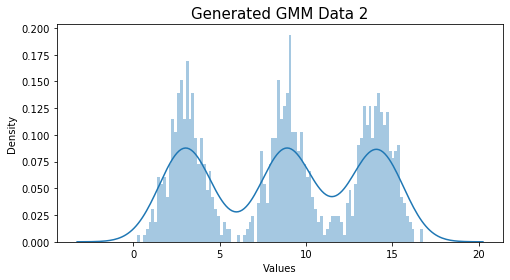

In [28]:
"""Using Approach #2"""
# random:
x1,x2,x3 = 0,2,4
#given:
mu1, mu2, mu3 = x1+3,x2+7,x3+10 #choose random locations
sigma1 = sigma2 = sigma3 = 1
w1 = w2 = w3 = 0.33

n = (1000//3)
np.random.seed(222)
# init 3 random arrays
arr1 = np.random.rand(n+1) #add 1 just to make even 1000
arr2 = np.random.rand(n)
arr3 =np.random.rand(n)
# ppf = inverse of cdf
# ppf takes a percentage and returns a std. dev. multiplier for what value the percentage occurs at
# norm.ppf returns a VALUE for each item in the array - that represents where that percentage of data 
# points would be contained if the distribution fits the paramaters specified
dist1 = norm.ppf(q=arr1, loc=mu1, scale=sigma1) 
dist2 = norm.ppf(q=arr2, loc=mu2, scale=sigma2) 
dist3 = norm.ppf(q=arr3, loc=mu3, scale=sigma3) 
gmm2 = np.concatenate([dist1,dist2,dist3])

plt.figure(figsize=(8,4))
sns.distplot(gmm2, bins=100)
plt.title('Generated GMM Data 2', fontsize=15)
plt.xlabel("Values", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.show()

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, 'Generated GMM Data 2')]

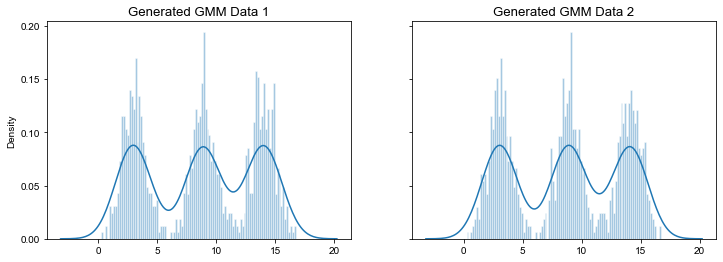

In [29]:
"""Comparative Histograms"""
f, axs = plt.subplots(1,2,
                      figsize=(12,4),
                      sharey=True)

sns.set_theme(style="whitegrid", palette='bright', font_scale=1.1)

sns.distplot(gmm, bins=100, ax=axs[0])
sns.distplot(gmm2, bins=100, ax=axs[1])
axs[0].set(ylabel= 'Density', xlabel='', title='Generated GMM Data 1')
axs[1].set(title= 'Generated GMM Data 2', ylabel='', xlabel='')


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [30]:
randomistan_salaries = stats.norm.rvs(loc=70000, scale=30000, size=10000)

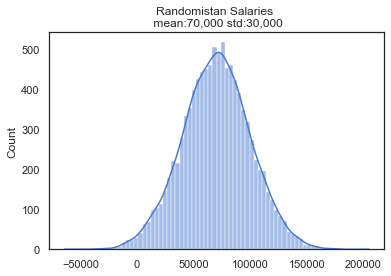

In [31]:
sns.set(style='white', palette="muted", color_codes=True)
sns.histplot(randomistan_salaries, kde=True)
plt.title('Randomistan Salaries \n mean:70,000 std:30,000')
plt.show()

#### 4.A
What percent of people earn less than 50,000 RCU?

In [32]:
# P(X < 50000) = P(X <= 49999) = CDF_X(49999)
print("%.2f%% of people at the company earn less than 50,000 RCU as their annual salary." % 
      (100*scipy.stats.norm.cdf(49999, loc=70000, scale=30000)))

25.25% of people at the company earn less than 50,000 RCU as their annual salary.


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [33]:
# P(45000 < x < 65000) 
#cdf(65000) - cdf(45000)
print("%.2f%% of people at the company earn between 45,000 RCU and 65,000 RCU as their annual salary." % 
      (100*(scipy.stats.norm.cdf(65000, loc=70000, scale=30000)-scipy.stats.norm.cdf(45000, loc=70000, scale=30000))))

23.15% of people at the company earn between 45,000 RCU and 65,000 RCU as their annual salary.


#### 4.C
What percent of people earn more than 70,000 RCU?

In [34]:
# P(x>70000) = 1 - P(x <= 70000)
print("%.2f%% of people at the company earn more than 70,000 RCU as their annual salary." % 
      (100*(scipy.stats.norm.sf(70000, loc=70000, scale=30000))) + 
      " This makes sense as the salaries are approximately normally distributed with mean salary of 70,000 RCU.")

50.00% of people at the company earn more than 70,000 RCU as their annual salary. This makes sense as the salaries are approximately normally distributed with mean salary of 70,000 RCU.


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [35]:
# P(x > 140,000) = 1-P(x<= 139,999)
print("I expect %d out of 1000 employees to earn more than 140,000 RCU as their annual salary." % 
     (math.ceil(scipy.stats.norm.sf(140000, loc=70000, scale=30000)*1000)))

I expect 10 out of 1000 employees to earn more than 140,000 RCU as their annual salary.


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [36]:
# E(Tn) = n(1+1/2 + 1/3 + ... + 1/n)
def expectCoupon(N):
    harmonic = [1/i for i in range(1, N+1)]
    return N * sum(harmonic)

In [37]:
expectCoupon(N=100), expectCoupon(N=30)

(518.737751763962, 119.84961392761171)

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [38]:
# Pi = (N-i+1)/N
# Var(Tn) = sum((1-Pi)/pi^2)

def varCoupon(N):
    l = [1/i**2 for i in range(1, N+1)]
    return N**2 * sum(l) - expectCoupon(N)

In [39]:
varCoupon(N=100), varCoupon(N=30)

(15831.101250084961, 1331.085491913826)

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [40]:
# P(T > 60) = 1-P(T<=60)
# 1 - P(T<=60) = 1 - [P(T=1) + P(T=2) + P(T=3) + ..... + P(T=60)]
# where each P(T=k) is a convolution.. 

In [41]:
def exact(N, k, i=1):
    K = np.arange(k)
    G = scipy.stats.geom(p=i/N, loc=-1)
    if i==N:
        return G.pmf(K)
    return np.convolve(G.pmf(K), exact(N, k, i+1))[:k-N+1]

def coupon_survival(N, k):
    if k >= N:
        return 1 - exact(N, k).sum()
    else:
        raise AssertionError()

In [42]:
coupon_survival(30,60)

0.9940158432042814

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

By Chebicheff we have $P(|T-\mu| \geq \lambda) \leq \frac{V(T)}{\lambda^2}$

Let $\lambda = \mu - 60$, where $\mu$ = E(T)

$P(|T-\mu|<(\mu - 60)) \geq 1 - \frac{V(T)}{(\mu - 60)^2}$

In [43]:
1 - varCoupon(N=30)/(expectCoupon(N=30)-60)**2

0.6283935500524922